In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random

In [46]:
df_train = pd.read_csv("training_data.csv")
df_train.head()

,MID,02/01/2020,09/01/2020,16/01/2020,23/01/2020,30/01/2020,06/02/2020,13/02/2020,20/02/2020,27/02/2020,...,20/08/2020,27/08/2020,03/09/2020,10/09/2020,17/09/2020,24/09/2020,01/10/2020,08/10/2020,15/10/2020,Label
0,21086601.0,85.48,88.12,178.00,229.25,297.27,407.88,176.00,174.08,203.70,...,478.14,583.58,214.06,202.47,363.12,245.54,293.99,284.42,424.68,Takeaway
1,23762911.0,216.19,158.77,149.21,237.29,338.44,396.78,281.51,177.11,314.01,...,173.42,312.96,286.78,242.65,328.20,457.11,304.64,334.62,512.63,Takeaway
2,25976231.0,198.34,138.07,91.73,93.20,118.49,283.31,117.09,141.65,236.88,...,76.56,206.13,136.82,124.90,70.40,106.42,175.84,77.72,88.21,Takeaway
3,27527491.0,90.21,167.16,94.78,123.45,207.25,169.84,213.11,81.40,80.52,...,150.01,253.97,183.70,63.53,122.39,132.44,147.76,96.04,129.87,Takeaway
4,27650631.0,216.03,118.97,161.03,184.29,156.03,256.82,261.59,252.41,149.72,...,166.48,199.55,165.85,93.50,136.72,189.58,200.91,73.95,184.91,Takeaway


In [168]:
df_train_norm = df_train.iloc[:, 1:-1].fillna(0)
df_train_norm = df_train_norm.apply(lambda x: ((x - x.min()) / (x.max() - x.min())), axis=1)
df_train_norm['Label'] = df_train['Label']
df_train_norm.head()

,02/01/2020,09/01/2020,16/01/2020,23/01/2020,30/01/2020,06/02/2020,13/02/2020,20/02/2020,27/02/2020,05/03/2020,...,20/08/2020,27/08/2020,03/09/2020,10/09/2020,17/09/2020,24/09/2020,01/10/2020,08/10/2020,15/10/2020,Label
0,0.000000,0.004087,0.143215,0.222547,0.327838,0.499056,0.140120,0.137147,0.182997,0.179638,...,0.607814,0.771029,0.199034,0.181093,0.429770,0.247763,0.322761,0.307947,0.525061,Takeaway
1,0.172981,0.024689,0.000000,0.227473,0.488701,0.639369,0.341675,0.072054,0.425609,0.159345,...,0.062524,0.422897,0.355285,0.241316,0.462256,0.795176,0.401410,0.478836,0.938560,Takeaway
2,0.656465,0.412792,0.225439,0.231382,0.333630,1.000000,0.327970,0.427266,0.812283,0.339492,...,0.164106,0.687960,0.407738,0.359546,0.139201,0.284831,0.565497,0.168796,0.211207,Takeaway
3,0.074064,0.287677,0.086750,0.166338,0.398967,0.295117,0.415235,0.049607,0.047164,0.291397,...,0.240069,0.528662,0.333592,0.000000,0.163396,0.191294,0.233823,0.090248,0.184160,Takeaway
4,0.698640,0.345591,0.498581,0.583188,0.480394,0.847010,0.864361,0.830969,0.457442,0.541648,...,0.518405,0.638695,0.516114,0.252946,0.410156,0.602430,0.643642,0.181835,0.585443,Takeaway


In [169]:
df_plot = df_train_norm.loc[df_train_norm['Label'] == 'Takeaway'].sample(5)
df_plot = df_plot.append(df_train_norm.loc[df_train_norm['Label'] == 'Dine-in'].sample(5))
df_plot = df_plot.reset_index(drop=True)
df_plot

,02/01/2020,09/01/2020,16/01/2020,23/01/2020,30/01/2020,06/02/2020,13/02/2020,20/02/2020,27/02/2020,05/03/2020,...,20/08/2020,27/08/2020,03/09/2020,10/09/2020,17/09/2020,24/09/2020,01/10/2020,08/10/2020,15/10/2020,Label
0,0.101851,0.350360,0.318765,0.239179,0.942631,0.224901,0.409653,0.266974,0.243997,0.058776,...,0.055445,0.765834,0.188681,0.253763,0.148080,0.283079,0.189247,0.286539,0.304131,Takeaway
1,0.362134,0.067032,0.077594,0.355989,0.117631,0.563891,0.571676,0.092776,0.354623,0.700938,...,0.479014,0.000000,0.497997,0.427710,0.289480,0.539263,0.238221,0.570378,0.655210,Takeaway
2,0.221422,0.366325,0.692727,0.884486,0.562908,0.908566,0.857077,0.811444,0.678191,0.879029,...,0.396368,0.473581,0.493195,0.393271,0.521763,0.263073,0.263220,0.156470,0.427843,Takeaway
3,0.054950,0.024060,0.037291,0.059844,0.123186,0.219483,0.604429,0.000000,0.017008,0.194529,...,0.221213,0.349405,0.090715,0.396539,0.051563,0.141180,0.027670,0.175754,0.216301,Takeaway
4,0.074064,0.287677,0.086750,0.166338,0.398967,0.295117,0.415235,0.049607,0.047164,0.291397,...,0.240069,0.528662,0.333592,0.000000,0.163396,0.191294,0.233823,0.090248,0.184160,Takeaway
5,0.982490,0.781092,0.780840,0.795979,0.623150,0.419948,0.724668,0.697244,0.504103,0.669402,...,0.938217,1.000000,0.638884,0.876650,0.790258,0.544072,0.526757,0.617293,0.538227,Dine-in
6,0.343287,0.414695,0.401072,0.427530,0.640195,0.492367,0.508186,0.469583,0.440432,0.441043,...,0.830626,1.000000,0.701855,0.714987,0.641923,0.699440,0.548666,0.469553,0.539282,Dine-in
7,0.849886,0.543123,0.618511,0.561133,0.694871,0.578105,0.744273,0.912599,0.685143,0.610971,...,0.750659,1.000000,0.669196,0.485906,0.576460,0.660320,0.774852,0.612118,0.282518,Dine-in
8,0.992500,0.357395,0.357911,0.352630,0.415191,0.160411,0.495644,0.233782,0.358510,0.371678,...,0.838292,1.000000,0.504665,0.585363,0.622926,0.526704,0.478917,0.491858,0.419517,Dine-in
9,0.420261,0.291061,0.358561,0.460744,0.470780,0.356449,0.629582,0.522613,0.463844,0.384808,...,0.817878,1.000000,0.746785,0.631031,0.843231,0.776763,0.845702,0.908309,0.683875,Dine-in


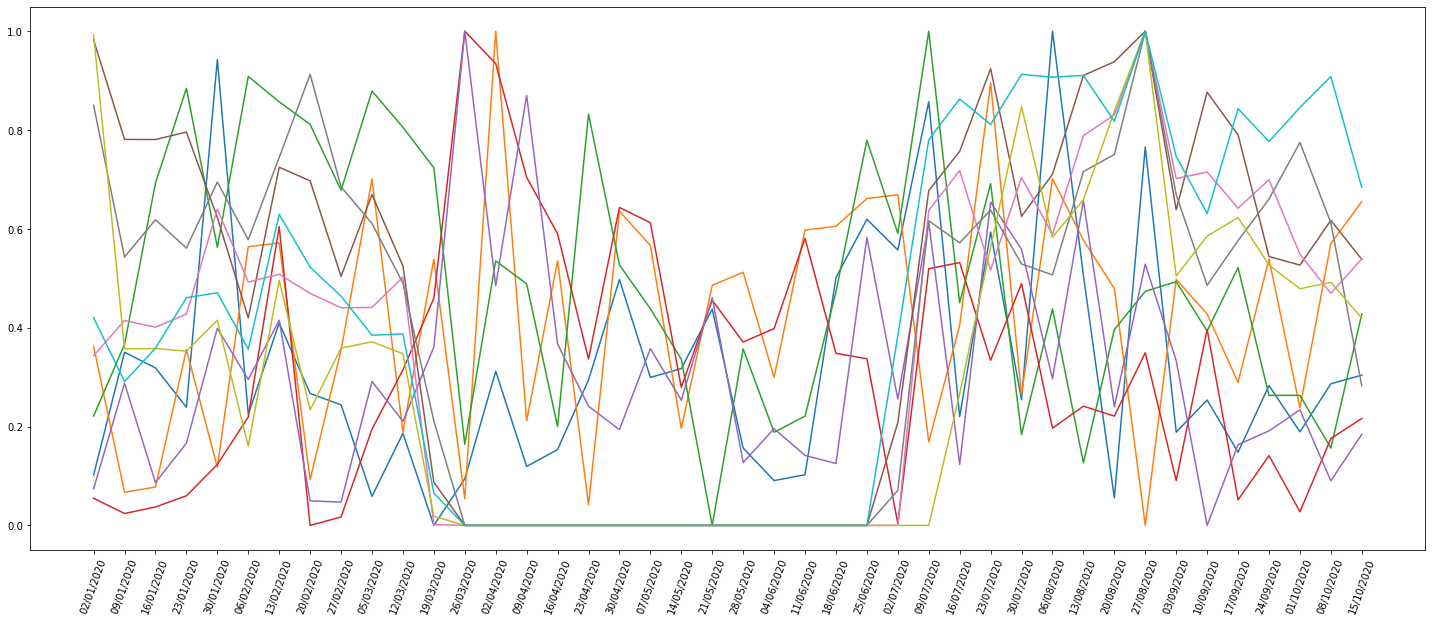

In [170]:
def plot (ind):
    x = df_plot.iloc[:,:-1].columns
    y = df_plot.iloc[ind,:-1]
    plt.plot(x, y)
plt.figure(figsize=(25,10))
for i in df_plot.index:
    plot(i)
plt.xticks(rotation=70)
plt.show()

In [171]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [172]:
x_train = df_train_norm.iloc[:,:-1]
y_train = df_train_norm.iloc[:,-1]
x_train

,02/01/2020,09/01/2020,16/01/2020,23/01/2020,30/01/2020,06/02/2020,13/02/2020,20/02/2020,27/02/2020,05/03/2020,...,13/08/2020,20/08/2020,27/08/2020,03/09/2020,10/09/2020,17/09/2020,24/09/2020,01/10/2020,08/10/2020,15/10/2020
0,0.000000,0.004087,0.143215,0.222547,0.327838,0.499056,0.140120,0.137147,0.182997,0.179638,...,0.097845,0.607814,0.771029,0.199034,0.181093,0.429770,0.247763,0.322761,0.307947,0.525061
1,0.172981,0.024689,0.000000,0.227473,0.488701,0.639369,0.341675,0.072054,0.425609,0.159345,...,0.221198,0.062524,0.422897,0.355285,0.241316,0.462256,0.795176,0.401410,0.478836,0.938560
2,0.656465,0.412792,0.225439,0.231382,0.333630,1.000000,0.327970,0.427266,0.812283,0.339492,...,0.876486,0.164106,0.687960,0.407738,0.359546,0.139201,0.284831,0.565497,0.168796,0.211207
3,0.074064,0.287677,0.086750,0.166338,0.398967,0.295117,0.415235,0.049607,0.047164,0.291397,...,0.657108,0.240069,0.528662,0.333592,0.000000,0.163396,0.191294,0.233823,0.090248,0.184160
4,0.698640,0.345591,0.498581,0.583188,0.480394,0.847010,0.864361,0.830969,0.457442,0.541648,...,0.373527,0.518405,0.638695,0.516114,0.252946,0.410156,0.602430,0.643642,0.181835,0.585443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.449953,0.194475,0.323127,0.328727,0.383861,0.176788,0.519600,0.358233,0.339376,0.272442,...,0.649671,0.683232,1.000000,0.450418,0.525404,0.511467,0.498416,0.503811,0.445256,0.374279
57,0.992500,0.357395,0.357911,0.352630,0.415191,0.160411,0.495644,0.233782,0.358510,0.371678,...,0.658852,0.838292,1.000000,0.504665,0.585363,0.622926,0.526704,0.478917,0.491858,0.419517
58,0.291795,0.229177,0.235461,0.368706,0.304072,0.329071,0.457368,0.244855,0.283084,0.349083,...,0.654641,0.758513,1.000000,0.587048,0.558430,0.404088,0.415862,0.325572,0.295782,0.173826
59,0.932250,0.478256,0.669103,0.848433,0.737887,0.753652,1.000000,0.883515,0.924606,0.559773,...,0.049487,0.088603,0.098888,0.069501,0.043986,0.053077,0.059161,0.041824,0.033433,0.038475


In [173]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [174]:
df_test = pd.read_csv("test_data.csv", sep='\\t')
df_pivot = pd.pivot_table(df_test, values='spend', index=['MID'], columns=['WeekStartDT'], aggfunc=np.sum)
df_test = df_pivot.rename_axis(None, axis=1).reset_index()
df_test = df_test.iloc[:,:-3]
df_test

,MID,2020-01-02,2020-01-09,2020-01-16,2020-01-23,2020-01-30,2020-02-06,2020-02-13,2020-02-20,2020-02-27,...,2020-08-13,2020-08-20,2020-08-27,2020-09-03,2020-09-10,2020-09-17,2020-09-24,2020-10-01,2020-10-08,2020-10-15
0,*32977779100065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,*35088228800029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,18.49,NaN,NaN,NaN,NaN,8.67,NaN,NaN
2,*35336371600088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,*37954596500020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,*37959120900018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61081,YVXXVYD3CSF4NZK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61082,YZWCA3G09VIIKKQ,NaN,NaN,NaN,NaN,179.38,214.75,387.7,287.81,501.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61083,ZCAU4XB43NQJFTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.84,23.92,116.76,42.72,NaN,NaN,117.56,69.04,26.20,98.68
61084,ZCQKTZIXQ3Y6L5B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.82,93.91,116.96,23.78,53.92,56.21,68.97,NaN,33.01,13.95


In [175]:
col_before = df_test.iloc[:10,1:12].columns
col_after = df_test.iloc[:10,28:].columns
print(col_before)
col_after

Index(['2020-01-02', '2020-01-09', '2020-01-16', '2020-01-23', '2020-01-30',
       '2020-02-06', '2020-02-13', '2020-02-20', '2020-02-27', '2020-03-05',
       '2020-03-12'],
      dtype='object')


Index(['2020-07-09', '2020-07-16', '2020-07-23', '2020-07-30', '2020-08-06',
       '2020-08-13', '2020-08-20', '2020-08-27', '2020-09-03', '2020-09-10',
       '2020-09-17', '2020-09-24', '2020-10-01', '2020-10-08', '2020-10-15'],
      dtype='object')

In [176]:
col = col_before.append(col_after).tolist()
col

['2020-01-02',
 '2020-01-09',
 '2020-01-16',
 '2020-01-23',
 '2020-01-30',
 '2020-02-06',
 '2020-02-13',
 '2020-02-20',
 '2020-02-27',
 '2020-03-05',
 '2020-03-12',
 '2020-07-09',
 '2020-07-16',
 '2020-07-23',
 '2020-07-30',
 '2020-08-06',
 '2020-08-13',
 '2020-08-20',
 '2020-08-27',
 '2020-09-03',
 '2020-09-10',
 '2020-09-17',
 '2020-09-24',
 '2020-10-01',
 '2020-10-08',
 '2020-10-15']

In [177]:
df_test_cleaned = df_test
for col in col:
    df_test_cleaned = df_test_cleaned[df_test[col].notna()]
df_test_cleaned

,MID,2020-01-02,2020-01-09,2020-01-16,2020-01-23,2020-01-30,2020-02-06,2020-02-13,2020-02-20,2020-02-27,...,2020-08-13,2020-08-20,2020-08-27,2020-09-03,2020-09-10,2020-09-17,2020-09-24,2020-10-01,2020-10-08,2020-10-15
773,000000000626626,547.59,469.77,416.14,245.41,333.61,473.04,409.30,378.44,334.26,...,32.08,72.80,88.30,31.46,26.33,16.45,31.75,78.35,12.30,43.99
1042,000000002385761,148.50,30.20,65.70,104.25,85.60,156.25,145.95,21.95,206.70,...,166.10,142.95,210.95,150.80,179.50,43.35,126.40,211.15,100.55,133.10
1052,000000002869061,140.10,66.40,106.50,188.30,102.10,143.30,54.30,82.30,36.10,...,259.90,210.60,147.00,257.30,112.40,88.20,148.60,200.70,177.00,218.10
1073,000000003546881,819.60,902.60,960.60,929.30,960.20,682.80,1062.20,882.30,824.40,...,1112.90,1359.50,1484.30,875.20,1589.60,1252.80,1293.90,1152.20,1117.00,1233.00
1086,000000005142571,396.09,252.01,263.02,312.69,317.71,369.05,398.60,415.51,364.02,...,629.98,790.10,867.37,761.60,686.94,784.11,749.18,525.45,678.53,620.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60466,GB7200056170826,909.05,587.25,497.70,686.80,750.90,281.85,638.15,466.70,662.60,...,1116.85,1169.55,1263.60,745.25,887.15,904.20,923.70,1012.40,817.55,1150.05
60468,GB7200059854826,42.55,109.35,75.20,56.05,28.90,90.45,17.20,62.00,72.40,...,185.25,55.00,114.45,70.55,166.40,104.75,71.55,361.05,51.90,179.70
60470,GB7200067105826,223.15,161.21,236.57,285.45,249.92,246.26,354.26,369.70,414.75,...,594.01,778.12,871.53,625.05,701.32,603.08,575.89,747.91,755.75,702.44
60496,HRBDFKWEIVLJNGN,915.75,834.70,655.75,893.20,472.50,916.70,795.45,584.70,661.70,...,1013.10,801.25,1570.85,1299.30,709.80,1041.65,1043.95,947.20,805.75,1275.65


In [178]:
df_test_norm = df_test_cleaned.iloc[:, 1:].fillna(0)
df_test_norm = df_test_norm.apply(lambda x: ((x - x.min()) / (x.max() - x.min())), axis=1)
df_test_norm['MID'] = df_test_cleaned['MID']
df_test_norm

,2020-01-02,2020-01-09,2020-01-16,2020-01-23,2020-01-30,2020-02-06,2020-02-13,2020-02-20,2020-02-27,2020-03-05,...,2020-08-20,2020-08-27,2020-09-03,2020-09-10,2020-09-17,2020-09-24,2020-10-01,2020-10-08,2020-10-15,MID
773,1.000000,0.857886,0.759948,0.448164,0.609233,0.863858,0.747457,0.691101,0.610420,0.717800,...,0.132946,0.161252,0.057452,0.048083,0.030041,0.057981,0.143082,0.022462,0.080334,000000000626626
1042,0.427895,0.027895,0.147929,0.278276,0.215216,0.454100,0.419273,0.000000,0.624683,0.260524,...,0.409129,0.639053,0.435672,0.532713,0.072358,0.353170,0.639730,0.265765,0.375824,000000002385761
1052,0.428571,0.203120,0.325788,0.576017,0.312328,0.438360,0.166106,0.251759,0.110431,0.557663,...,0.644234,0.449679,0.787091,0.343836,0.269807,0.454573,0.613949,0.541450,0.667177,000000002869061
1073,0.515601,0.567816,0.604303,0.584612,0.604051,0.429542,0.668218,0.555045,0.518621,0.375315,...,0.855247,0.933757,0.550579,1.000000,0.788123,0.813978,0.724836,0.702693,0.775667,000000003546881
1086,0.420996,0.267856,0.279559,0.332352,0.337688,0.392256,0.423664,0.441637,0.386910,0.529144,...,0.839781,0.921910,0.809489,0.730135,0.833415,0.796288,0.558490,0.721196,0.659241,000000005142571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60466,0.515175,0.250852,0.177297,0.332621,0.385272,0.000000,0.292661,0.151834,0.312744,0.270894,...,0.729147,0.806399,0.380632,0.497187,0.511191,0.527209,0.600066,0.440018,0.713130,GB7200056170826
60468,0.117851,0.302867,0.208281,0.155242,0.080044,0.250519,0.047639,0.171721,0.200526,0.280709,...,0.152333,0.316992,0.195402,0.460878,0.290126,0.198172,1.000000,0.143747,0.497715,GB7200059854826
60470,0.078242,0.000000,0.095194,0.156938,0.112057,0.107434,0.243858,0.263361,0.320268,0.267505,...,0.779271,0.897265,0.585915,0.682259,0.558163,0.523817,0.741110,0.751014,0.683673,GB7200067105826
60496,0.331647,0.281652,0.171267,0.317737,0.058230,0.332233,0.257441,0.127440,0.174938,0.000000,...,0.261018,0.735743,0.568239,0.204608,0.409308,0.410727,0.351047,0.263794,0.553650,HRBDFKWEIVLJNGN


In [179]:
x_test = df_test_norm.iloc[:,:-1]
x_test

,2020-01-02,2020-01-09,2020-01-16,2020-01-23,2020-01-30,2020-02-06,2020-02-13,2020-02-20,2020-02-27,2020-03-05,...,2020-08-13,2020-08-20,2020-08-27,2020-09-03,2020-09-10,2020-09-17,2020-09-24,2020-10-01,2020-10-08,2020-10-15
773,1.000000,0.857886,0.759948,0.448164,0.609233,0.863858,0.747457,0.691101,0.610420,0.717800,...,0.058584,0.132946,0.161252,0.057452,0.048083,0.030041,0.057981,0.143082,0.022462,0.080334
1042,0.427895,0.027895,0.147929,0.278276,0.215216,0.454100,0.419273,0.000000,0.624683,0.260524,...,0.487405,0.409129,0.639053,0.435672,0.532713,0.072358,0.353170,0.639730,0.265765,0.375824
1052,0.428571,0.203120,0.325788,0.576017,0.312328,0.438360,0.166106,0.251759,0.110431,0.557663,...,0.795044,0.644234,0.449679,0.787091,0.343836,0.269807,0.454573,0.613949,0.541450,0.667177
1073,0.515601,0.567816,0.604303,0.584612,0.604051,0.429542,0.668218,0.555045,0.518621,0.375315,...,0.700113,0.855247,0.933757,0.550579,1.000000,0.788123,0.813978,0.724836,0.702693,0.775667
1086,0.420996,0.267856,0.279559,0.332352,0.337688,0.392256,0.423664,0.441637,0.386910,0.529144,...,0.669593,0.839781,0.921910,0.809489,0.730135,0.833415,0.796288,0.558490,0.721196,0.659241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60466,0.515175,0.250852,0.177297,0.332621,0.385272,0.000000,0.292661,0.151834,0.312744,0.270894,...,0.685860,0.729147,0.806399,0.380632,0.497187,0.511191,0.527209,0.600066,0.440018,0.713130
60468,0.117851,0.302867,0.208281,0.155242,0.080044,0.250519,0.047639,0.171721,0.200526,0.280709,...,0.513087,0.152333,0.316992,0.195402,0.460878,0.290126,0.198172,1.000000,0.143747,0.497715
60470,0.078242,0.000000,0.095194,0.156938,0.112057,0.107434,0.243858,0.263361,0.320268,0.267505,...,0.546706,0.779271,0.897265,0.585915,0.682259,0.558163,0.523817,0.741110,0.751014,0.683673
60496,0.331647,0.281652,0.171267,0.317737,0.058230,0.332233,0.257441,0.127440,0.174938,0.000000,...,0.391697,0.261018,0.735743,0.568239,0.204608,0.409308,0.410727,0.351047,0.263794,0.553650


In [192]:
predictions = logisticRegr.predict(x_test)
predictions

array(['Dine-in', 'Takeaway', 'Dine-in', ..., 'Takeaway', 'Takeaway',
       'Takeaway'], dtype=object)

In [215]:
predictions_prob = logisticRegr.predict_proba(x_test)
predictions_prob

array([[0.78953232, 0.21046768],
       [0.01827721, 0.98172279],
       [0.53198978, 0.46801022],
       ...,
       [0.00123567, 0.99876433],
       [0.00141779, 0.99858221],
       [0.00637598, 0.99362402]])

In [230]:
df_prediction = pd.DataFrame(df_test_norm['MID'].reset_index(drop=True))
s1 = pd.Series(predictions)  
df_prediction = pd.concat((df_prediction,s1), axis=1, join='inner')
df_prediction["prob_1"],df_prediction["prob_2"] = predictions_prob[:,0], predictions_prob[:,1]
df_prediction["Prob"] = df_prediction[["prob_1","prob_2"]].max(axis=1)
df_prediction = df_prediction.rename(columns={0: "Prediction"})
df_prediction

,MID,Prediction,prob_1,prob_2,Prob
0,000000000626626,Dine-in,0.789532,0.210468,0.789532
1,000000002385761,Takeaway,0.018277,0.981723,0.981723
2,000000002869061,Dine-in,0.531990,0.468010,0.531990
3,000000003546881,Dine-in,0.537964,0.462036,0.537964
4,000000005142571,Takeaway,0.039681,0.960319,0.960319
...,...,...,...,...,...
14680,GB7200056170826,Takeaway,0.006844,0.993156,0.993156
14681,GB7200059854826,Takeaway,0.073260,0.926740,0.926740
14682,GB7200067105826,Takeaway,0.001236,0.998764,0.998764
14683,HRBDFKWEIVLJNGN,Takeaway,0.001418,0.998582,0.998582


In [231]:
df_pred = df_prediction[['MID','Prediction','Prob']]
df_pred

,MID,Prediction,Prob
0,000000000626626,Dine-in,0.789532
1,000000002385761,Takeaway,0.981723
2,000000002869061,Dine-in,0.531990
3,000000003546881,Dine-in,0.537964
4,000000005142571,Takeaway,0.960319
...,...,...,...
14680,GB7200056170826,Takeaway,0.993156
14681,GB7200059854826,Takeaway,0.926740
14682,GB7200067105826,Takeaway,0.998764
14683,HRBDFKWEIVLJNGN,Takeaway,0.998582


In [232]:
df_pred.to_csv('df_prediction.csv', index=False)